In [1]:
!pip install q keras==2.1.5

  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [5]:
# %tensorflow_version 1.x

In [6]:
import Ipynb_importer
import keras
# from tensorflow import keras
from keras import backend as K
from keras.optimizers import Optimizer
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential
import numpy as np
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from optimizers import MaSS
from cifar10 import load
from resnet import resnet_v1, resnet_v2
import os
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 

Using TensorFlow backend.


In [7]:
tf.__version__

'1.14.0'

In [11]:
keras.__version__

'2.1.5'

In [12]:
batch_size = 64  
epochs = 150
data_augmentation = True
num_classes = 10

## Load Cifar-10 data
#(x_train, y_train), (x_test, y_test) = load()
#input_shape = x_train.shape[1:]

# Model parameters
n = 5
version = 1
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)



os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 
# batch_size = 32
# epochs = 100
data_augmentation = True
num_classes = 10
learning_rate=0.1
# Load Cifar-10 data
(x_train, y_train), (x_test, y_test) = load()
input_shape = x_train.shape[1:]

# Model parameters
n = 5
version = 1
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)
################################################################
# Whenever learning rate reduces, restart the MaSS optimizer at the latest learned weights.
# (If not reducing learning rate during training, one can have only one stage.)
#
#Stage 1: epoch 1-150. Learning rate: 0.1
################################################################


#
#
#################################################################
## Whenever learning rate reduces, restart the MaSS optimizer at the latest learned weights.
## (If not reducing learning rate during training, one can have only one stage.)
##
##Stage 1: epoch 1-150. Learning rate: 0.1
#################################################################

# Build model
model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = 0.1, alpha = 0.05, kappa_t = 2)
model.compile(loss='categorical_crossentropy',
             optimizer=mass,
             metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
   os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
   result1 = model.fit(x_train, y_train,
             batch_size=batch_size,
             epochs=100,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=callbacks)
else:
   print('Using real-time data augmentation.')

   # This will do preprocessing and realtime data augmentation:
   datagen = ImageDataGenerator(
       featurewise_center=False,           	# set input mean to 0 over the dataset
       samplewise_center=False,            	# set each sample mean to 0        
       featurewise_std_normalization=False,    # divide inputs by std of dataset        
       samplewise_std_normalization=False,     # divide each input by its std
       zca_whitening=False,                    # apply ZCA whitening        
       rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
       width_shift_range=0.1,                  # randomly shift images horizontally        
       height_shift_range=0.1,                 # randomly shift images vertically        
       horizontal_flip=True,                   # randomly flip images        
       vertical_flip=False)                    # randomly flip images

   res1 = datagen.fit(x_train)
   # Fit the model on the batches generated by datagen.flow().
   result1 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                       validation_data=(x_test, y_test),
                       epochs=150, verbose=1, workers=4,
                                callbacks=callbacks)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Load CIFAR-10 dataset.
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 32, 32, 16)   448         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 32, 32, 16)   64          conv2d_67[0][0]                  
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 32, 32, 16)   0           batch_normalization_6

Epoch 1/150
782/782 [==============================] - 33s 42ms/step - loss: 1.9621 - acc: 0.3644 - val_loss: 1.7449 - val_acc: 0.4404

Epoch 00001: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.001.h5
Epoch 2/150
782/782 [==============================] - 27s 34ms/step - loss: 1.5055 - acc: 0.5268 - val_loss: 1.6325 - val_acc: 0.5099

Epoch 00002: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.002.h5
Epoch 3/150
782/782 [==============================] - 27s 34ms/step - loss: 1.2583 - acc: 0.6226 - val_loss: 1.4371 - val_acc: 0.5612

Epoch 00003: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.003.h5
Epoch 4/150
782/782 [==============================] - 27s 34ms/step - loss: 1.1076 - acc: 0.6772 - val_loss: 1.1376 - val_acc: 0.6773

Epoch 00004: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.004.h5
Epoch 5/150
782/782 [==============================] - 27s 35ms/step - loss:

782/782 [==============================] - 29s 37ms/step - loss: 0.5717 - acc: 0.8858 - val_loss: 0.9472 - val_acc: 0.7864

Epoch 00036: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.036.h5
Epoch 37/150
782/782 [==============================] - 29s 38ms/step - loss: 0.5693 - acc: 0.8872 - val_loss: 0.8363 - val_acc: 0.8155

Epoch 00037: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.037.h5
Epoch 38/150
782/782 [==============================] - 29s 37ms/step - loss: 0.5686 - acc: 0.8898 - val_loss: 0.7064 - val_acc: 0.8447

Epoch 00038: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.038.h5
Epoch 39/150
782/782 [==============================] - 29s 37ms/step - loss: 0.5661 - acc: 0.8896 - val_loss: 0.8527 - val_acc: 0.8136

Epoch 00039: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.039.h5
Epoch 40/150
782/782 [==============================] - 29s 37ms/step - loss: 0.5640 

782/782 [==============================] - 29s 38ms/step - loss: 0.5329 - acc: 0.9065 - val_loss: 0.7154 - val_acc: 0.8561

Epoch 00071: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.071.h5
Epoch 72/150
782/782 [==============================] - 29s 38ms/step - loss: 0.5318 - acc: 0.9064 - val_loss: 0.7161 - val_acc: 0.8499

Epoch 00072: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.072.h5
Epoch 73/150
782/782 [==============================] - 29s 38ms/step - loss: 0.5318 - acc: 0.9067 - val_loss: 0.7579 - val_acc: 0.8390

Epoch 00073: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.073.h5
Epoch 74/150
782/782 [==============================] - 29s 38ms/step - loss: 0.5319 - acc: 0.9092 - val_loss: 0.8146 - val_acc: 0.8310

Epoch 00074: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.074.h5
Epoch 75/150
782/782 [==============================] - 29s 38ms/step - loss: 0.5313 

782/782 [==============================] - 30s 38ms/step - loss: 0.5238 - acc: 0.9118 - val_loss: 0.7267 - val_acc: 0.8598

Epoch 00106: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.106.h5
Epoch 107/150
782/782 [==============================] - 30s 38ms/step - loss: 0.5195 - acc: 0.9136 - val_loss: 0.9407 - val_acc: 0.7971

Epoch 00107: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.107.h5
Epoch 108/150
782/782 [==============================] - 29s 38ms/step - loss: 0.5187 - acc: 0.9141 - val_loss: 0.6982 - val_acc: 0.8626

Epoch 00108: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.108.h5
Epoch 109/150
782/782 [==============================] - 30s 38ms/step - loss: 0.5222 - acc: 0.9128 - val_loss: 0.7166 - val_acc: 0.8573

Epoch 00109: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.109.h5
Epoch 110/150
782/782 [==============================] - 30s 38ms/step - loss: 0.5

782/782 [==============================] - 30s 38ms/step - loss: 0.5075 - acc: 0.9182 - val_loss: 0.7392 - val_acc: 0.8549

Epoch 00141: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.141.h5
Epoch 142/150
782/782 [==============================] - 30s 38ms/step - loss: 0.5163 - acc: 0.9157 - val_loss: 0.7227 - val_acc: 0.8590

Epoch 00142: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.142.h5
Epoch 143/150
782/782 [==============================] - 29s 38ms/step - loss: 0.5071 - acc: 0.9174 - val_loss: 0.6727 - val_acc: 0.8695

Epoch 00143: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.143.h5
Epoch 144/150
782/782 [==============================] - 30s 38ms/step - loss: 0.5110 - acc: 0.9163 - val_loss: 0.6834 - val_acc: 0.8678

Epoch 00144: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.144.h5
Epoch 145/150
782/782 [==============================] - 30s 38ms/step - loss: 0.5

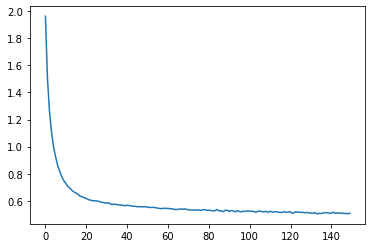

In [13]:
import matplotlib.pyplot as plt

plt.plot(result1.history['loss'])

In [14]:
# Build model
os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 
model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = 0.1, alpha = 0.05, kappa_t = 2)
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.1),
             metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
   os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
   result2 = model.fit(x_train, y_train,
             batch_size=batch_size,
             epochs=100,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=callbacks)
else:
   print('Using real-time data augmentation.')

   # This will do preprocessing and realtime data augmentation:
   datagen = ImageDataGenerator(
       featurewise_center=False,           	# set input mean to 0 over the dataset
       samplewise_center=False,            	# set each sample mean to 0        
       featurewise_std_normalization=False,    # divide inputs by std of dataset        
       samplewise_std_normalization=False,     # divide each input by its std
       zca_whitening=False,                    # apply ZCA whitening        
       rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
       width_shift_range=0.1,                  # randomly shift images horizontally        
       height_shift_range=0.1,                 # randomly shift images vertically        
       horizontal_flip=True,                   # randomly flip images        
       vertical_flip=False)                    # randomly flip images

   res2 = datagen.fit(x_train)
   # Fit the model on the batches generated by datagen.flow().
   result2 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                       validation_data=(x_test, y_test),
                       epochs=epochs, verbose=1, workers=4,
                                callbacks=callbacks)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_100 (Conv2D)             (None, 32, 32, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 32, 32, 16)   64          conv2d_100[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 32, 32, 16)   0           batch_normalization_94[0][0]     
__________________________________________________________________________________________________
conv2d_101

Epoch 1/150
782/782 [==============================] - 32s 41ms/step - loss: 1.8178 - acc: 0.4083 - val_loss: 1.4473 - val_acc: 0.5410

Epoch 00001: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.001.h5
Epoch 2/150
782/782 [==============================] - 26s 33ms/step - loss: 1.3496 - acc: 0.5789 - val_loss: 1.6250 - val_acc: 0.5464

Epoch 00002: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.002.h5
Epoch 3/150
782/782 [==============================] - 27s 34ms/step - loss: 1.1523 - acc: 0.6577 - val_loss: 1.7022 - val_acc: 0.5324

Epoch 00003: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.003.h5
Epoch 4/150
782/782 [==============================] - 27s 35ms/step - loss: 1.0294 - acc: 0.7041 - val_loss: 1.3065 - val_acc: 0.6350

Epoch 00004: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.004.h5
Epoch 5/150
782/782 [==============================] - 27s 35ms/step - loss:

782/782 [==============================] - 27s 34ms/step - loss: 0.4152 - acc: 0.9113 - val_loss: 0.7463 - val_acc: 0.8237

Epoch 00036: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.036.h5
Epoch 37/150
782/782 [==============================] - 27s 35ms/step - loss: 0.4077 - acc: 0.9132 - val_loss: 0.6510 - val_acc: 0.8407

Epoch 00037: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.037.h5
Epoch 38/150
782/782 [==============================] - 27s 35ms/step - loss: 0.4072 - acc: 0.9138 - val_loss: 0.6832 - val_acc: 0.8335

Epoch 00038: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.038.h5
Epoch 39/150
782/782 [==============================] - 27s 35ms/step - loss: 0.4008 - acc: 0.9146 - val_loss: 0.6005 - val_acc: 0.8578

Epoch 00039: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.039.h5
Epoch 40/150
782/782 [==============================] - 27s 35ms/step - loss: 0.3982 

782/782 [==============================] - 27s 35ms/step - loss: 0.3178 - acc: 0.9430 - val_loss: 0.5523 - val_acc: 0.8791

Epoch 00071: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.071.h5
Epoch 72/150
782/782 [==============================] - 27s 34ms/step - loss: 0.3186 - acc: 0.9428 - val_loss: 0.6703 - val_acc: 0.8595

Epoch 00072: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.072.h5
Epoch 73/150
782/782 [==============================] - 27s 35ms/step - loss: 0.3095 - acc: 0.9463 - val_loss: 1.0796 - val_acc: 0.7757

Epoch 00073: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.073.h5
Epoch 74/150
782/782 [==============================] - 27s 35ms/step - loss: 0.3156 - acc: 0.9435 - val_loss: 0.6796 - val_acc: 0.8622

Epoch 00074: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.074.h5
Epoch 75/150
782/782 [==============================] - 27s 35ms/step - loss: 0.3108 

782/782 [==============================] - 27s 35ms/step - loss: 0.2860 - acc: 0.9549 - val_loss: 0.6219 - val_acc: 0.8671

Epoch 00106: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.106.h5
Epoch 107/150
782/782 [==============================] - 27s 35ms/step - loss: 0.2779 - acc: 0.9574 - val_loss: 0.7225 - val_acc: 0.8524

Epoch 00107: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.107.h5
Epoch 108/150
782/782 [==============================] - 27s 35ms/step - loss: 0.2848 - acc: 0.9542 - val_loss: 0.7200 - val_acc: 0.8535

Epoch 00108: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.108.h5
Epoch 109/150
782/782 [==============================] - 27s 35ms/step - loss: 0.2778 - acc: 0.9572 - val_loss: 0.7314 - val_acc: 0.8602

Epoch 00109: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.109.h5
Epoch 110/150
782/782 [==============================] - 27s 34ms/step - loss: 0.2

782/782 [==============================] - 27s 34ms/step - loss: 0.2663 - acc: 0.9606 - val_loss: 0.6259 - val_acc: 0.8778

Epoch 00141: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.141.h5
Epoch 142/150
782/782 [==============================] - 27s 34ms/step - loss: 0.2602 - acc: 0.9639 - val_loss: 0.6119 - val_acc: 0.8749

Epoch 00142: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.142.h5
Epoch 143/150
782/782 [==============================] - 27s 34ms/step - loss: 0.2666 - acc: 0.9613 - val_loss: 0.6594 - val_acc: 0.8721

Epoch 00143: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.143.h5
Epoch 144/150
782/782 [==============================] - 27s 34ms/step - loss: 0.2634 - acc: 0.9624 - val_loss: 0.5811 - val_acc: 0.8882

Epoch 00144: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.144.h5
Epoch 145/150
782/782 [==============================] - 27s 35ms/step - loss: 0.2

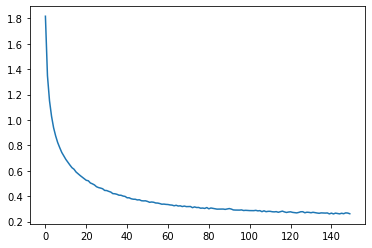

In [15]:
import matplotlib.pyplot as plt

plt.plot(result2.history['loss'])

In [16]:
# Build model
os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 
model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = 0.1, alpha = 0.05, kappa_t = 2)
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.1,momentum=0.9,nesterov=True),
             metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
   os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
   result3 = model.fit(x_train, y_train,
             batch_size=batch_size,
             epochs=100,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=callbacks)
else:
   print('Using real-time data augmentation.')

   # This will do preprocessing and realtime data augmentation:
   datagen = ImageDataGenerator(
       featurewise_center=False,           	# set input mean to 0 over the dataset
       samplewise_center=False,            	# set each sample mean to 0        
       featurewise_std_normalization=False,    # divide inputs by std of dataset        
       samplewise_std_normalization=False,     # divide each input by its std
       zca_whitening=False,                    # apply ZCA whitening        
       rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
       width_shift_range=0.1,                  # randomly shift images horizontally        
       height_shift_range=0.1,                 # randomly shift images vertically        
       horizontal_flip=True,                   # randomly flip images        
       vertical_flip=False)                    # randomly flip images

   res3 = datagen.fit(x_train)
   # Fit the model on the batches generated by datagen.flow().
   result3 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                       validation_data=(x_test, y_test),
                       epochs=epochs, verbose=1, workers=4,
                                callbacks=callbacks)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_133 (Conv2D)             (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_125 (BatchN (None, 32, 32, 16)   64          conv2d_133[0][0]                 
__________________________________________________________________________________________________
activation_125 (Activation)     (None, 32, 32, 16)   0           batch_normalization_125[0][0]    
__________________________________________________________________________________________________
conv2d_134

Epoch 1/150
782/782 [==============================] - 34s 43ms/step - loss: 2.3690 - acc: 0.2516 - val_loss: 1.9976 - val_acc: 0.3542

Epoch 00001: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.001.h5
Epoch 2/150
782/782 [==============================] - 27s 34ms/step - loss: 1.7900 - acc: 0.4341 - val_loss: 1.8528 - val_acc: 0.3974

Epoch 00002: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.002.h5
Epoch 3/150
782/782 [==============================] - 28s 35ms/step - loss: 1.5669 - acc: 0.5092 - val_loss: 1.7268 - val_acc: 0.4528

Epoch 00003: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.003.h5
Epoch 4/150
782/782 [==============================] - 28s 36ms/step - loss: 1.4346 - acc: 0.5533 - val_loss: 1.7110 - val_acc: 0.4880

Epoch 00004: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.004.h5
Epoch 5/150
782/782 [==============================] - 28s 36ms/step - loss:

782/782 [==============================] - 28s 36ms/step - loss: 0.7270 - acc: 0.8476 - val_loss: 1.0915 - val_acc: 0.7382

Epoch 00036: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.036.h5
Epoch 37/150
782/782 [==============================] - 28s 36ms/step - loss: 0.7245 - acc: 0.8516 - val_loss: 1.0776 - val_acc: 0.7420

Epoch 00037: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.037.h5
Epoch 38/150
782/782 [==============================] - 28s 36ms/step - loss: 0.7227 - acc: 0.8507 - val_loss: 1.0899 - val_acc: 0.7588

Epoch 00038: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.038.h5
Epoch 39/150
782/782 [==============================] - 28s 36ms/step - loss: 0.7243 - acc: 0.8519 - val_loss: 0.9869 - val_acc: 0.7760

Epoch 00039: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.039.h5
Epoch 40/150
782/782 [==============================] - 28s 36ms/step - loss: 0.7214 

782/782 [==============================] - 28s 36ms/step - loss: 0.6849 - acc: 0.8713 - val_loss: 1.0038 - val_acc: 0.7718

Epoch 00071: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.071.h5
Epoch 72/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6758 - acc: 0.8741 - val_loss: 0.7874 - val_acc: 0.8439

Epoch 00072: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.072.h5
Epoch 73/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6819 - acc: 0.8732 - val_loss: 0.8860 - val_acc: 0.8091

Epoch 00073: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.073.h5
Epoch 74/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6805 - acc: 0.8725 - val_loss: 1.0768 - val_acc: 0.7579

Epoch 00074: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.074.h5
Epoch 75/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6827 

782/782 [==============================] - 28s 36ms/step - loss: 0.6598 - acc: 0.8833 - val_loss: 0.9164 - val_acc: 0.7967

Epoch 00106: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.106.h5
Epoch 107/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6628 - acc: 0.8831 - val_loss: 0.7911 - val_acc: 0.8386

Epoch 00107: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.107.h5
Epoch 108/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6581 - acc: 0.8827 - val_loss: 0.9674 - val_acc: 0.7914

Epoch 00108: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.108.h5
Epoch 109/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6621 - acc: 0.8820 - val_loss: 0.8043 - val_acc: 0.8393

Epoch 00109: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.109.h5
Epoch 110/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6

782/782 [==============================] - 28s 36ms/step - loss: 0.6562 - acc: 0.8835 - val_loss: 0.9480 - val_acc: 0.7902

Epoch 00141: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.141.h5
Epoch 142/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6556 - acc: 0.8856 - val_loss: 1.0542 - val_acc: 0.7847

Epoch 00142: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.142.h5
Epoch 143/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6535 - acc: 0.8864 - val_loss: 0.9931 - val_acc: 0.7835

Epoch 00143: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.143.h5
Epoch 144/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6500 - acc: 0.8853 - val_loss: 1.0252 - val_acc: 0.7868

Epoch 00144: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.144.h5
Epoch 145/150
782/782 [==============================] - 28s 36ms/step - loss: 0.6

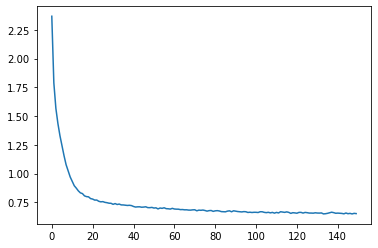

In [17]:
import matplotlib.pyplot as plt

plt.plot(result3.history['loss'])

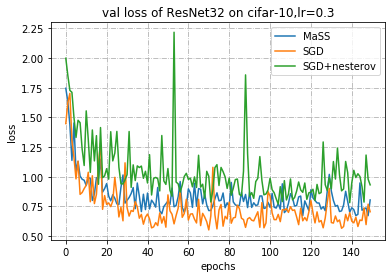

In [18]:
plt.plot(result1.history['val_loss'],label='MaSS')
plt.plot(result2.history['val_loss'],label='SGD')
plt.plot(result3.history['val_loss'],label='SGD+nesterov')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("val loss of ResNet32 on cifar-10,lr=0.3")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

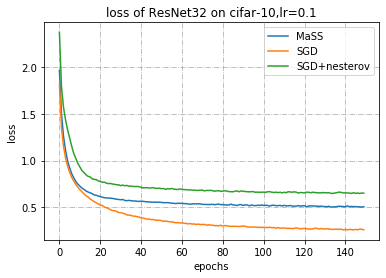

In [19]:
plt.plot(result1.history['loss'],label='MaSS')
plt.plot(result2.history['loss'],label='SGD')
plt.plot(result3.history['loss'],label='SGD+nesterov')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("loss of ResNet32 on cifar-10,lr=0.1")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

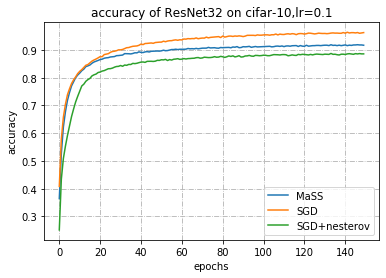

In [20]:
plt.plot(result1.history['acc'],label='MaSS')
plt.plot(result2.history['acc'],label='SGD')
plt.plot(result3.history['acc'],label='SGD+nesterov')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("accuracy of ResNet32 on cifar-10,lr=0.1")
plt.grid(linestyle='-.')
plt.legend()
plt.show()

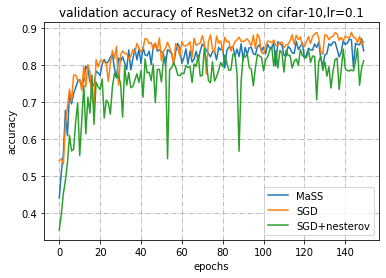

In [21]:
plt.plot(result1.history['val_acc'],label='MaSS')
plt.plot(result2.history['val_acc'],label='SGD')
plt.plot(result3.history['val_acc'],label='SGD+nesterov')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("validation accuracy of ResNet32 on cifar-10,lr=0.1")
plt.grid(linestyle='-.')
plt.legend()
plt.show()

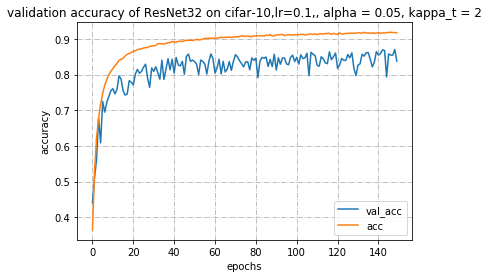

In [22]:
plt.plot(result1.history['val_acc'],label='val_acc')
plt.plot(result1.history['acc'],label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("validation accuracy of ResNet32 on cifar-10,lr=0.1,, alpha = 0.05, kappa_t = 2")
plt.grid(linestyle='-.')
plt.legend()
plt.show()

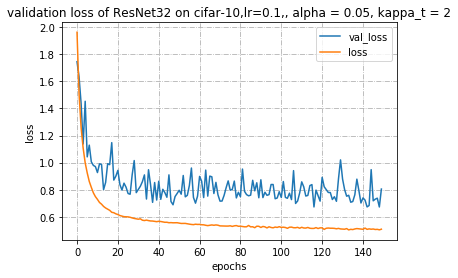

In [23]:
plt.plot(result1.history['val_loss'],label='val_loss')
plt.plot(result1.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("validation loss of ResNet32 on cifar-10,lr=0.1,, alpha = 0.05, kappa_t = 2")
plt.grid(linestyle='-.')
plt.legend()
plt.show()